In [1]:
import numpy as np
import cv2
import os 
import matplotlib.pyplot as plt

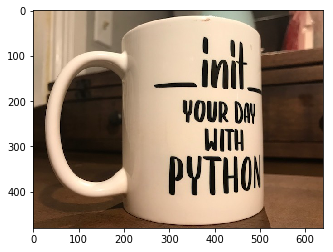

In [2]:
image = cv2.imread('../data/mug.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
image.shape
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

2


(480, 640)

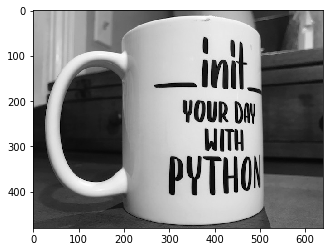

In [3]:
plt.imshow(gray,cmap="gray")
print (gray.ndim)
gray.shape

# Creating a Guassian co efficients with sigma 5.0  
#https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=gaussianblur#gaussianblur

In [4]:
G_coff_7 = cv2.getGaussianKernel(7,2.0)

In [5]:
G_coff_7.shape   # This created gaussian co efficients of 7 by 1 matrix

(7, 1)

In [6]:
# I am creating different gaussian filters with different STD ( sigma/smoothing operator )
sigma = [1,2.5,6.0,15.0,210.0]# for different smoothing operations 
G_Coff = dict()
G_Coeff = list()
i = 0

while i<len(sigma):
    G_Coeff.append(cv2.getGaussianKernel(7,sigma[i]))
    i+=1

In [7]:
len(G_Coeff)

5

In [8]:
G_Coeff[2]

array([[0.13312014],
       [0.14269314],
       [0.14876429],
       [0.15084488],
       [0.14876429],
       [0.14269314],
       [0.13312014]])

In [9]:
G_Coff["sig1.0"] = np.array(G_Coeff[0])
G_Coff["sig2.5"] = np.array(G_Coeff[1])
G_Coff["sig6.0"] = np.array(G_Coeff[2])
G_Coff["sig15.0"] = np.array(G_Coeff[3])
G_Coff["sig210.0"] = np.array(G_Coeff[4])


In [10]:
type(G_Coff['sig6.0'])

numpy.ndarray

In [11]:
# Using 1D array on either directoion for smoothing and then we will apply a sobel or prewitt for derivates 

In [12]:
opencvOutput = cv2.filter2D(gray, -1, kernel=G_Coff['sig210.0'])  # smoothing on column wise , along x axis(vertical)

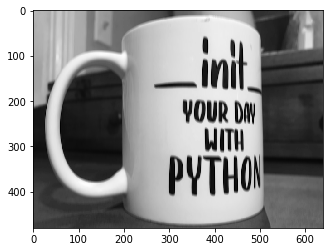

In [13]:
plt.imshow(opencvOutput,cmap='gray')


In [14]:
kernal_T = G_Coff['sig210.0'].T  # Here I am doing smoothing on row wise (top to bottom-along y axis ( horizontal)

In [15]:
kernal_T.shape

(1, 7)

In [16]:
opencvOutput_T = cv2.filter2D(opencvOutput, -1, kernel=kernal_T)  # make sure to operate on image colvolved with x axis 

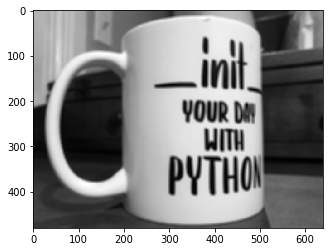

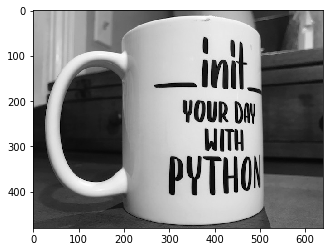

In [17]:
plt.imshow(opencvOutput_T,cmap='gray')
plt.show()
plt.imshow(gray,cmap='gray')

In [18]:
# creating sobel (Image Derivates in both y,x directions ) filters/mask ; partial derivatives where dy=0, then dx=0

In [19]:
Sobel5x = cv2.getDerivKernels(1,0,5)   # Horizontal edge detector 
y,x = Sobel5x
print(len(y))
print(len(x))

5
5


In [20]:
np.outer(Sobel5x[0],Sobel5x[1])  # no change in column or vertical axis , change only in row axis about 0 valued row 

array([[ -1.,  -4.,  -6.,  -4.,  -1.],
       [ -2.,  -8., -12.,  -8.,  -2.],
       [  0.,   0.,   0.,   0.,   0.],
       [  2.,   8.,  12.,   8.,   2.],
       [  1.,   4.,   6.,   4.,   1.]], dtype=float32)

## In an Image rows come first which is actually y axis on a cartesian plane so , apply Sobel5y on column which is x direction on Image plane and apply SObelx on y direction on the Image plane . The convention is reversed between cv2 and Image plane . otherwise it is wrong !!!

In [21]:
Sobel5y = cv2.getDerivKernels(0,1,5)  # In an Image rows come first which is actually y axis on a cartesian plane so

In [22]:
np.outer(Sobel5y[0],Sobel5y[1]) # change about column axis with 0 values , no change in horizontal or row axis 

array([[ -1.,  -2.,   0.,   2.,   1.],
       [ -4.,  -8.,   0.,   8.,   4.],
       [ -6., -12.,   0.,  12.,   6.],
       [ -4.,  -8.,   0.,   8.,   4.],
       [ -1.,  -2.,   0.,   2.,   1.]], dtype=float32)

In [23]:
# Now let us create sobel kernal size 7 
Sobel7x = cv2.getDerivKernels(1,0,7)

In [24]:
np.outer(Sobel7x[0],Sobel7x[1])   # Filter is not normalized , we have to normalize before operating it on an image 

array([[  -1.,   -6.,  -15.,  -20.,  -15.,   -6.,   -1.],
       [  -4.,  -24.,  -60.,  -80.,  -60.,  -24.,   -4.],
       [  -5.,  -30.,  -75., -100.,  -75.,  -30.,   -5.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.],
       [   5.,   30.,   75.,  100.,   75.,   30.,    5.],
       [   4.,   24.,   60.,   80.,   60.,   24.,    4.],
       [   1.,    6.,   15.,   20.,   15.,    6.,    1.]], dtype=float32)

In [25]:
Sobel7y = cv2.getDerivKernels(0,1,7)

In [26]:
np.outer(Sobel7y[0],Sobel7y[1])

array([[  -1.,   -4.,   -5.,    0.,    5.,    4.,    1.],
       [  -6.,  -24.,  -30.,    0.,   30.,   24.,    6.],
       [ -15.,  -60.,  -75.,    0.,   75.,   60.,   15.],
       [ -20.,  -80., -100.,    0.,  100.,   80.,   20.],
       [ -15.,  -60.,  -75.,    0.,   75.,   60.,   15.],
       [  -6.,  -24.,  -30.,    0.,   30.,   24.,    6.],
       [  -1.,   -4.,   -5.,    0.,    5.,    4.,    1.]], dtype=float32)

In [27]:
new_Image_7fx = cv2.filter2D(opencvOutput_T, -1,Sobel7x[0])

In [28]:
# cv2.imshow("newImage",new_Image_7fx)
# cv2.waitKey()

In [29]:
new_Image_7fy = cv2.filter2D(new_Image_7fx, -1,Sobel7y[0])   # this image has no change in vertical direction

In [30]:
# When I applied vertical sobel , I got blank white , so I applied it back on sobel x filtered Image adnd you can see 
#nochange in the filtered image 

In [31]:
# cv2.imshow("newImage_y",new_Image_7fy)
# cv2.waitKey()

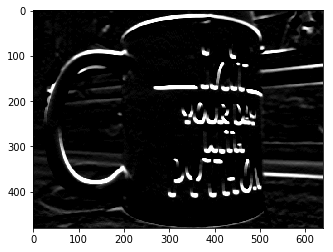

In [32]:
plt.imshow(new_Image_7fx,cmap='gray')  # 